# import modules

In [20]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.functions_ver2 import *
from modules.default_params_ver2 import *
from modules.contours_ver2 import *

# import data

In [21]:
# with open("../data/TACC_indiv_contour_mcz20_2024-06-12_17-29-23.pkl", "rb") as f:
# with open("../data/TACC_indiv_contour_mcz20_2024-06-27_12-33-55.pkl", "rb") as f:
# with open("../data/TACC_indiv_contour_mcz20_2024-06-27_14-35-53.pkl", "rb") as f:
with open("../data/TACC_indiv_contour_mcz20_2024-06-27_17-48-11.pkl", "rb") as f:
    # with open("../data/TACC_indiv_contour_mcz20_2024-06-27_18-07-08.pkl", "rb") as f:
    data_mcz20 = pickle.load(f)

data_mcz20["stats"] = contour_stats(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    data_mcz20["gammaP_min_matrix"],
    thres_factor=1.01,
    thres_diff=0,
)

data_mcz20

{'omega_matrix': array([[0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        ...,
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ]]),
 'theta_matrix': array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        ...,
        [19.8, 19.8, 19.8, ..., 19.8, 19.8, 19.8],
        [19.9, 19.9, 19.9, ..., 19.9, 19.9, 19.9],
        [20. , 20. , 20. , ..., 20. , 20. , 20. ]]),
 'epsilon_matrix': array([[0.22185862, 0.22185862, 0.22185862, ..., 0.22185862, 0.22185862,
         0.22185862],
        [0.22181849, 0.22178997, 0.22174288, ..., 0.21854751, 0.21858877,
         0.21863226],
        [0.22177839, 0.22172201, 0.22162941, ..., 0.21524517, 0.21532948,
         0.21541639],
        ...,
        [0.19609977, 0.1892393 , 0.18760846

In [22]:
# with open("../data/TACC_indiv_contour_mcz40_2024-06-12_17-35-25.pkl", "rb") as f:
# with open("../data/TACC_indiv_contour_mcz40_2024-06-27_12-35-50.pkl", "rb") as f:
# with open("../data/TACC_indiv_contour_mcz40_2024-06-27_15-04-52.pkl", "rb") as f:
with open("../data/TACC_indiv_contour_mcz40_2024-06-27_17-53-09.pkl", "rb") as f:
    data_mcz40 = pickle.load(f)

data_mcz40["stats"] = contour_stats(
    data_mcz40["omega_matrix"],
    data_mcz40["theta_matrix"],
    data_mcz40["epsilon_matrix"],
    data_mcz40["gammaP_min_matrix"],
    thres_factor=1.01,
    thres_diff=0,
)

data_mcz40

{'omega_matrix': array([[0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        ...,
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ],
        [0. , 0.1, 0.2, ..., 5.8, 5.9, 6. ]]),
 'theta_matrix': array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        ...,
        [19.8, 19.8, 19.8, ..., 19.8, 19.8, 19.8],
        [19.9, 19.9, 19.9, ..., 19.9, 19.9, 19.9],
        [20. , 20. , 20. , ..., 20. , 20. , 20. ]]),
 'epsilon_matrix': array([[0.17484291, 0.17484291, 0.17484291, ..., 0.17484291, 0.17484291,
         0.17484291],
        [0.1747093 , 0.17467965, 0.17461431, ..., 0.17203343, 0.17208224,
         0.17212974],
        [0.1745712 , 0.17451047, 0.1743776 , ..., 0.1693107 , 0.16940988,
         0.16950537],
        ...,
        [0.1256126 , 0.11433262, 0.09881672

# modify plotting function

In [23]:
def plot_indiv_contour_modified(X, Y, Z, P, src_params, n_levels=100):
    plt.contourf(X, Y, Z, levels=n_levels, cmap="jet")
    plt.xlabel(r"$\~\Omega$", fontsize=14)
    plt.ylabel(r"$\~\theta$", fontsize=14)
    plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
        label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", size=14
    )

    # # find ep_min_idx but X > 2
    # ep_min_idx1 = np.unravel_index(
    #     np.argsort(Z[np.where(X > 2)], axis=None)[:1], Z[np.where(X > 2)].shape
    # )
    # plt.scatter(
    #     X[np.where(X > 2)][ep_min_idx1],
    #     Y[np.where(X > 2)][ep_min_idx1],
    #     color="white",
    #     marker="o",
    # )
    # print(
    #     X[np.where(X > 2)][ep_min_idx1],
    #     Y[np.where(X > 2)][ep_min_idx1],
    #     P[np.where(X > 2)][ep_min_idx1],
    # )
    # # find another ep_min_idx but X < 2
    # ep_min_idx2 = np.unravel_index(
    #     np.argsort(Z[np.where(X < 2)], axis=None)[:1], Z[np.where(X < 2)].shape
    # )
    # plt.scatter(
    #     X[np.where(X < 2)][ep_min_idx2],
    #     Y[np.where(X < 2)][ep_min_idx2],
    #     color="white",
    #     marker="o",
    # )
    # print(
    #     X[np.where(X < 2)][ep_min_idx2],
    #     Y[np.where(X < 2)][ep_min_idx2],
    #     P[np.where(X < 2)][ep_min_idx2],
    # )

    # plt.suptitle(
    #     "Mismatch Between RP Templates and a Lensed Source",
    #     fontsize=16,
    #     y=1.0215,
    #     x=0.435,
    # )

    td = LensingGeo(src_params).td()
    I = LensingGeo(src_params).I()

    plt.title(
        r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.2g} {}, $\Delta t_d$ = {:.2g} ms, $I$ = {:.2g}".format(
            angle_in_pi_format(src_params["theta_S"]),
            angle_in_pi_format(src_params["phi_S"]),
            angle_in_pi_format(src_params["theta_J"]),
            angle_in_pi_format(src_params["phi_J"]),
            r"$\mathcal{M}_{\rm s}$",
            src_params["mcz"] / solar_mass,
            r"$M_{\odot}$",
            td * 1e3,
            I,
        ),
        # fontsize=12,
        # y=1.021,
    )

    plt.xlim(0, 4)
    plt.ylim(0, 15)

# make plots for $\mathcal{M_{\rm s}}$ = 20 $M_{\odot}$

In [29]:
lens_params_1["MLz"] = 2e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["Taman"]["random"], lens_params_1, RP_params_1
)
lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass

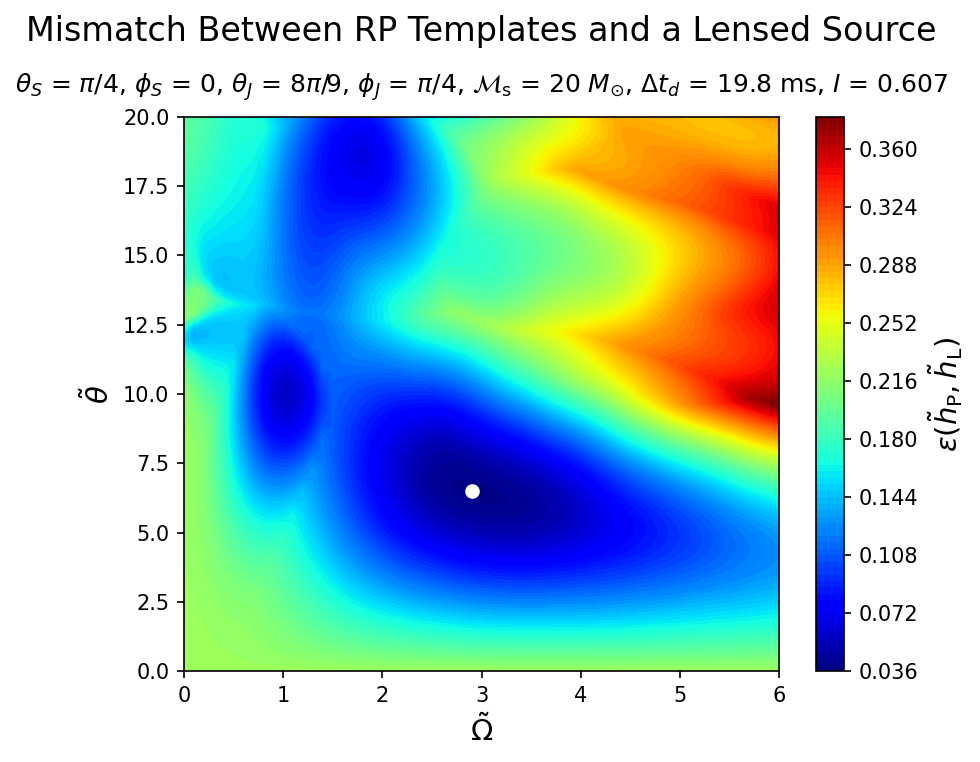

In [30]:
plot_indiv_contour(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    lens_params,
)

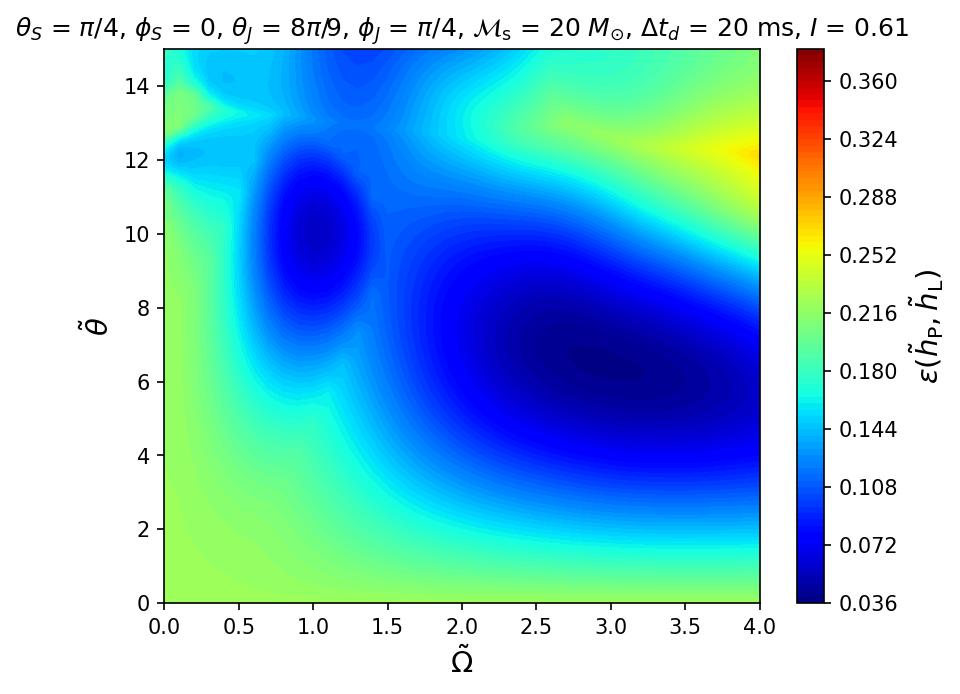

In [31]:
plot_indiv_contour_modified(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    data_mcz20["gammaP_min_matrix"],
    lens_params,
)

plt.savefig("../figures/contour_mcz20.pdf", bbox_inches="tight")

# make plots for $\mathcal{M_{\rm s}}$ = 40 $M_{\odot}$

In [27]:
lens_params_1["MLz"] = 2e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["Taman"]["random"], lens_params_1, RP_params_1
)
lens_params["mcz"] = RP_params["mcz"] = 40 * solar_mass

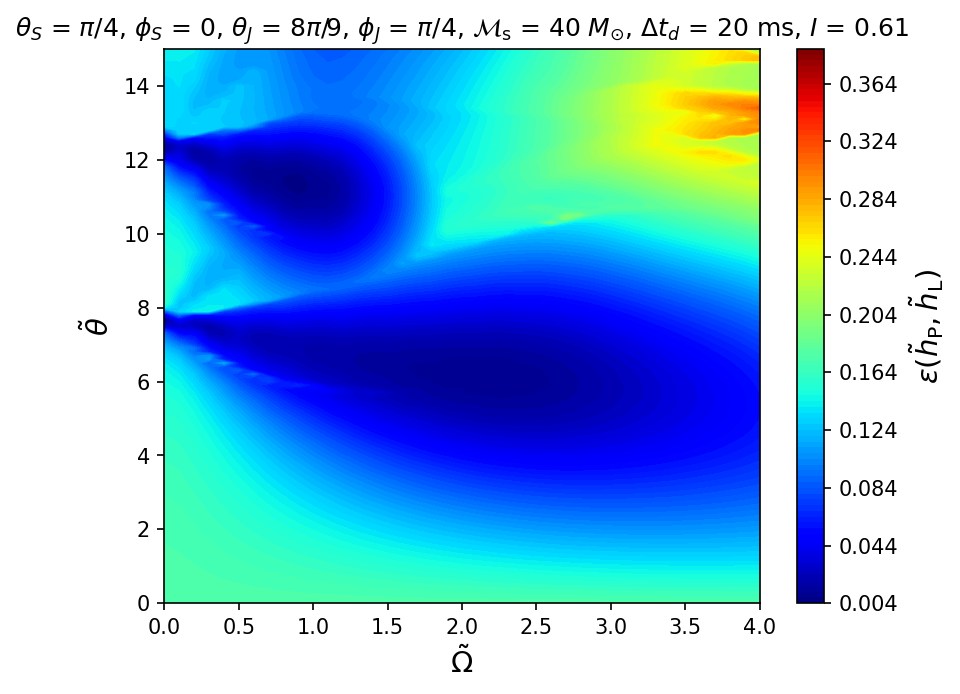

In [28]:
plot_indiv_contour_modified(
    data_mcz40["omega_matrix"],
    data_mcz40["theta_matrix"],
    data_mcz40["epsilon_matrix"],
    data_mcz40["gammaP_min_matrix"],
    lens_params,
)

plt.savefig("../figures/contour_mcz40.pdf", bbox_inches="tight")

# waveform comparison

idx = 2.32517e-08, phi = -3.74279e-08, both should be ~0 if get_updated_mismatch_results is True


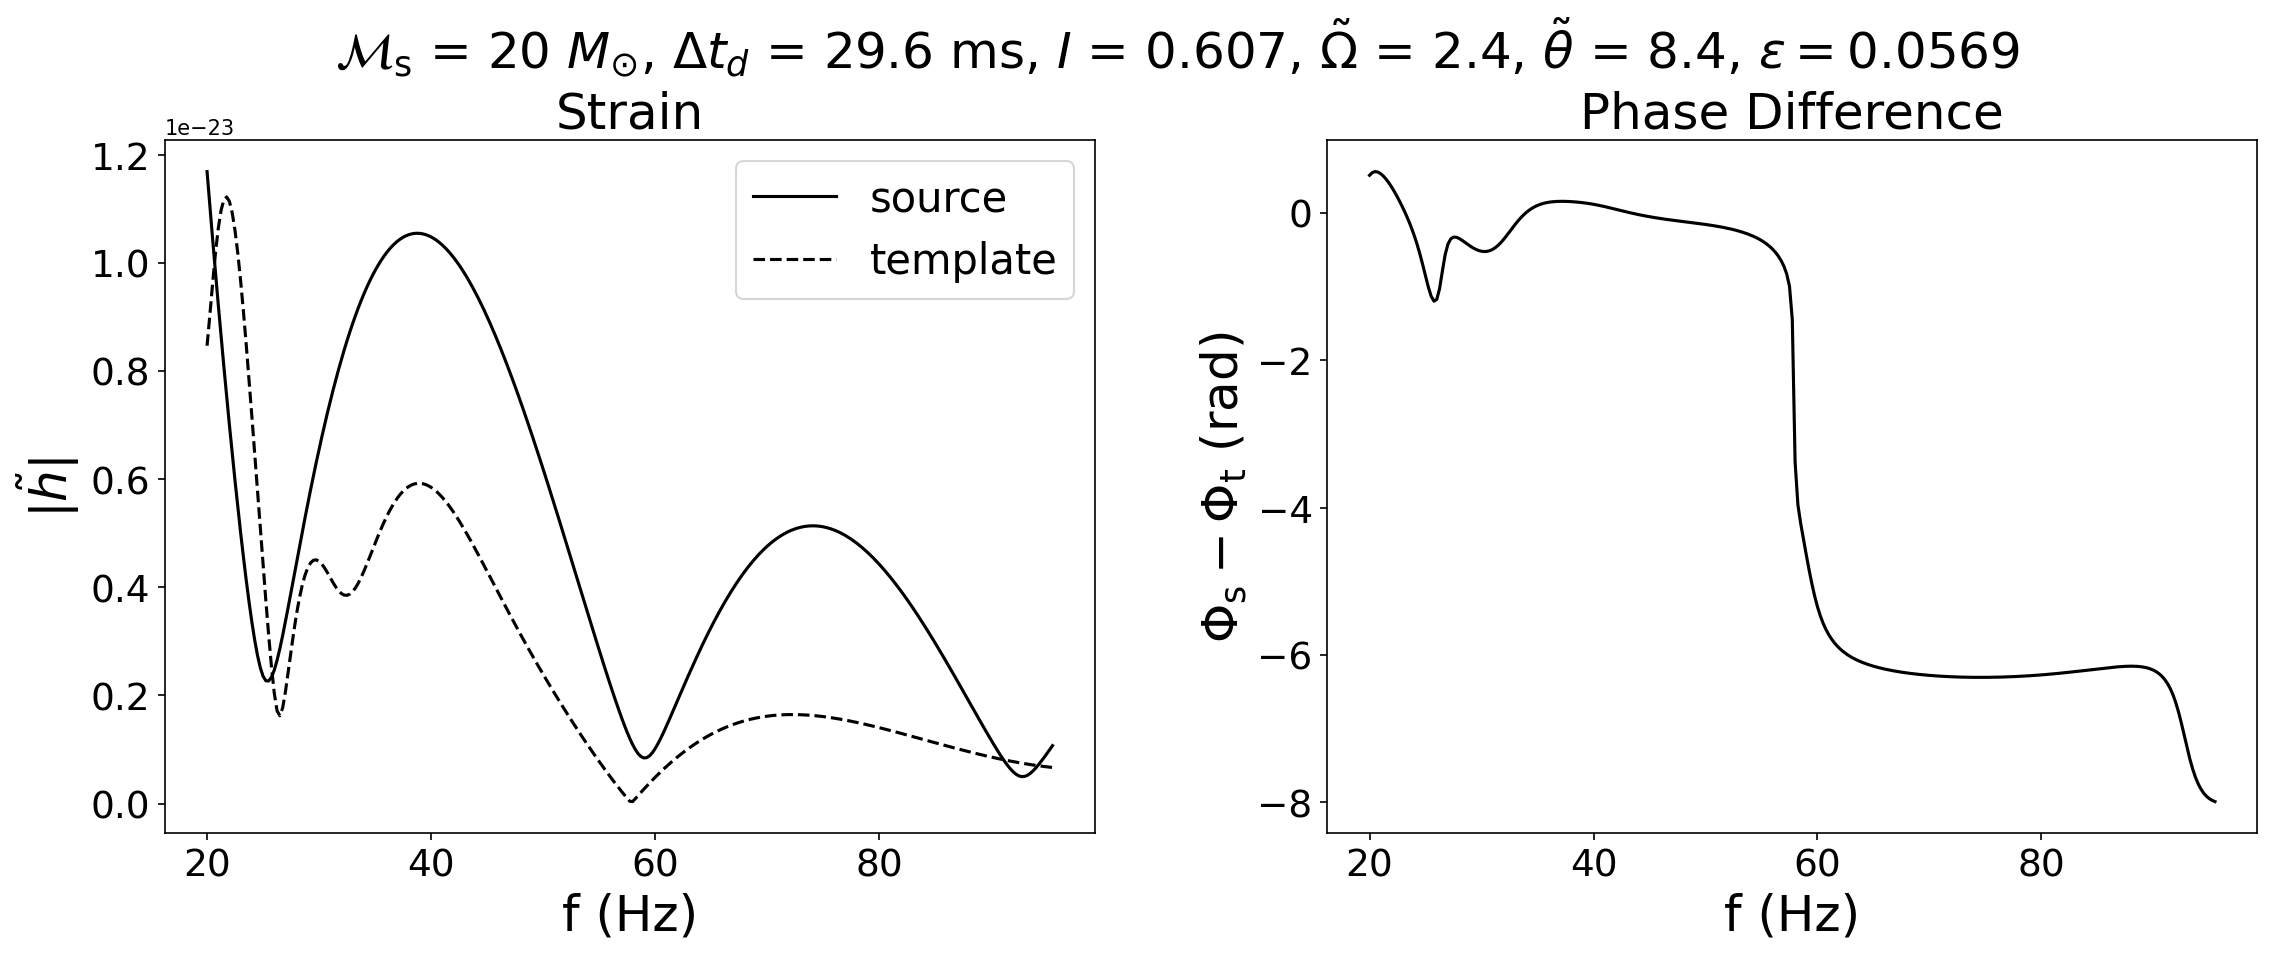

In [136]:
lens_params_0["MLz"] = 3e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["sys2"]["random"], lens_params_0, RP_params_0
)
lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass
RP_params["omega_tilde"] = data_mcz20["stats"]["ep_min_omega_tilde"]
RP_params["theta_tilde"] = data_mcz20["stats"]["ep_min_theta_tilde"]
RP_params["gamma_P"] = data_mcz20["stats"]["ep_min_gammaP"]

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz20_best.pdf", bbox_inches="tight")

idx = -4.51066e-08, phi = 3.73998e-08, both should be ~0 if get_updated_mismatch_results is True


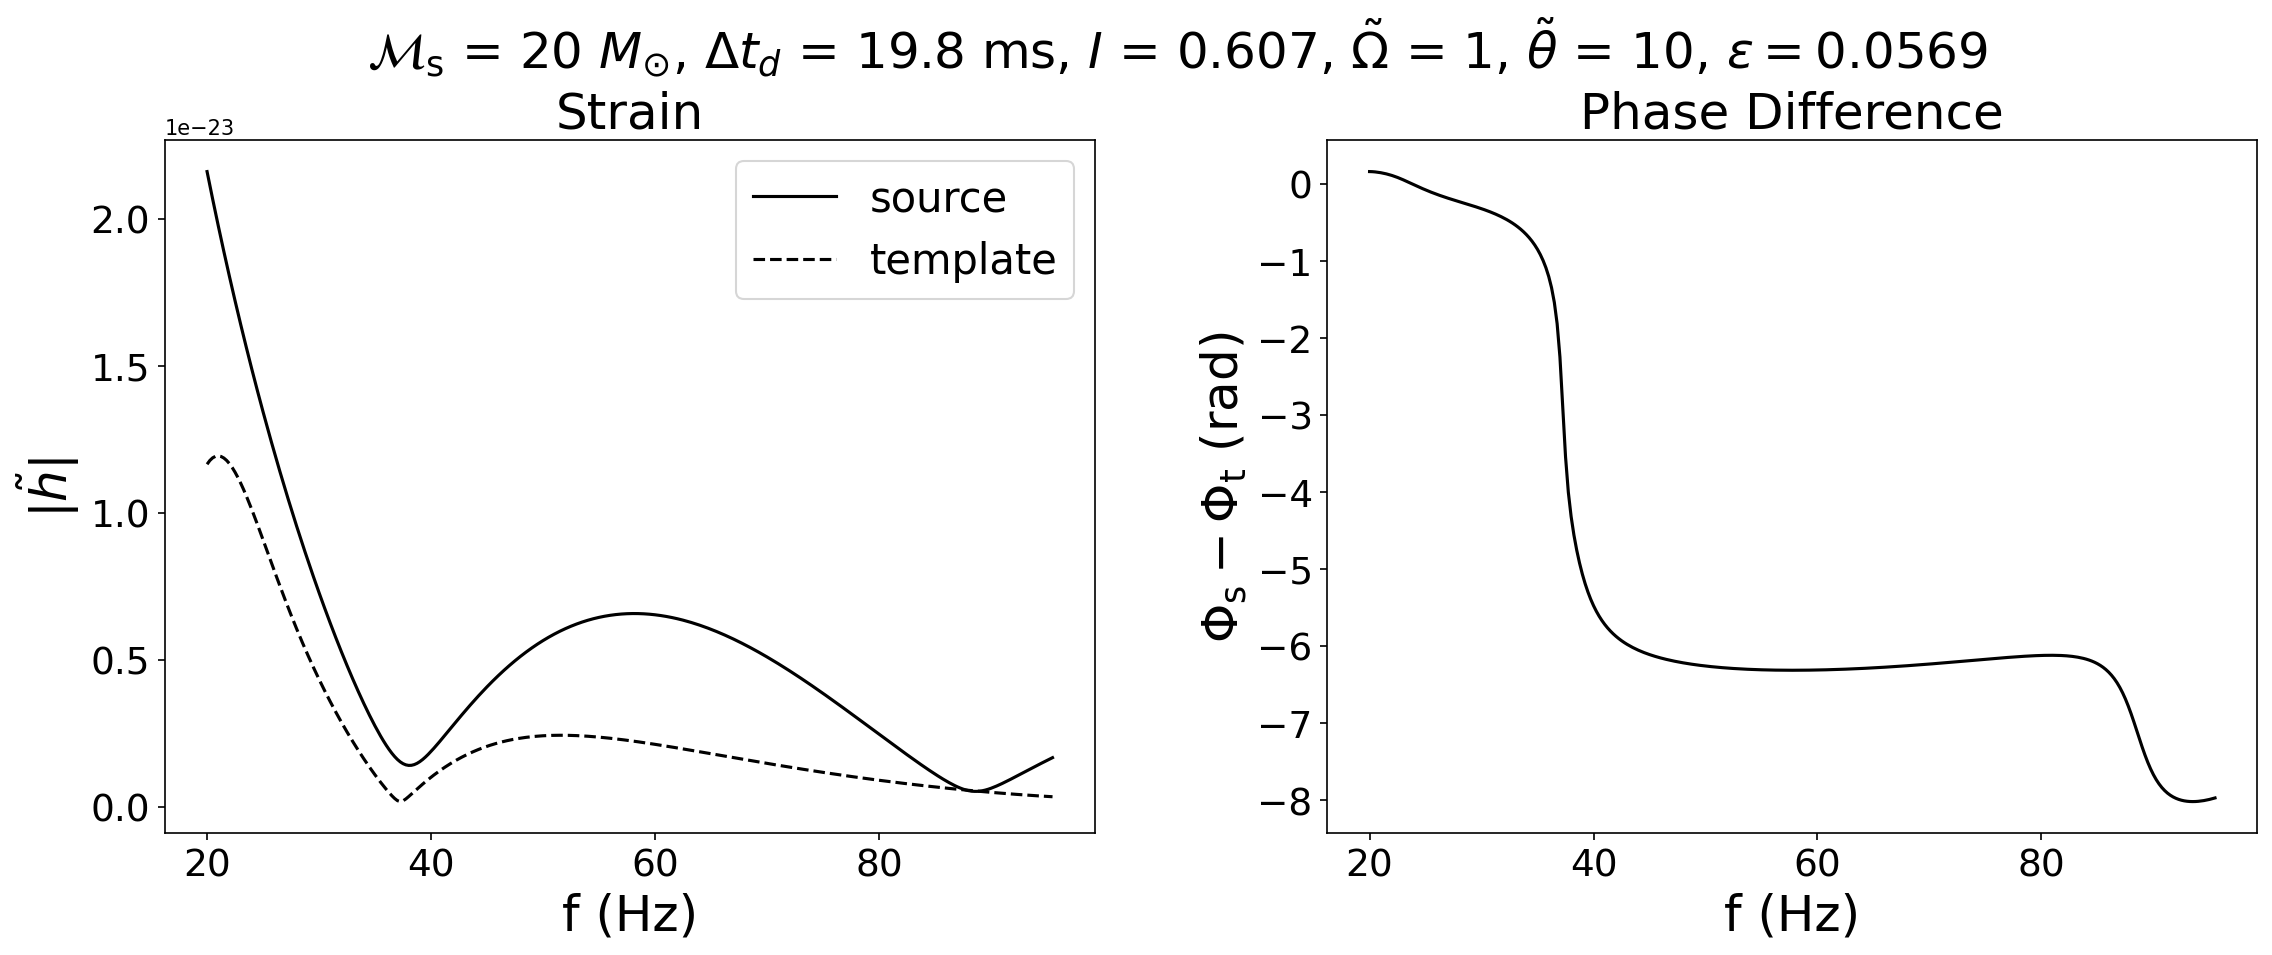

In [102]:
lens_params_0["MLz"] = 2e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["sys2"]["random"], lens_params_0, RP_params_0
)
lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass
RP_params["omega_tilde"] = 1
RP_params["theta_tilde"] = 10
RP_params["gamma_P"] = 4.06185717

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz20_best.pdf", bbox_inches="tight")

idx = -7.33437e-09, phi = 2.36222e-08, both should be ~0 if get_updated_mismatch_results is True


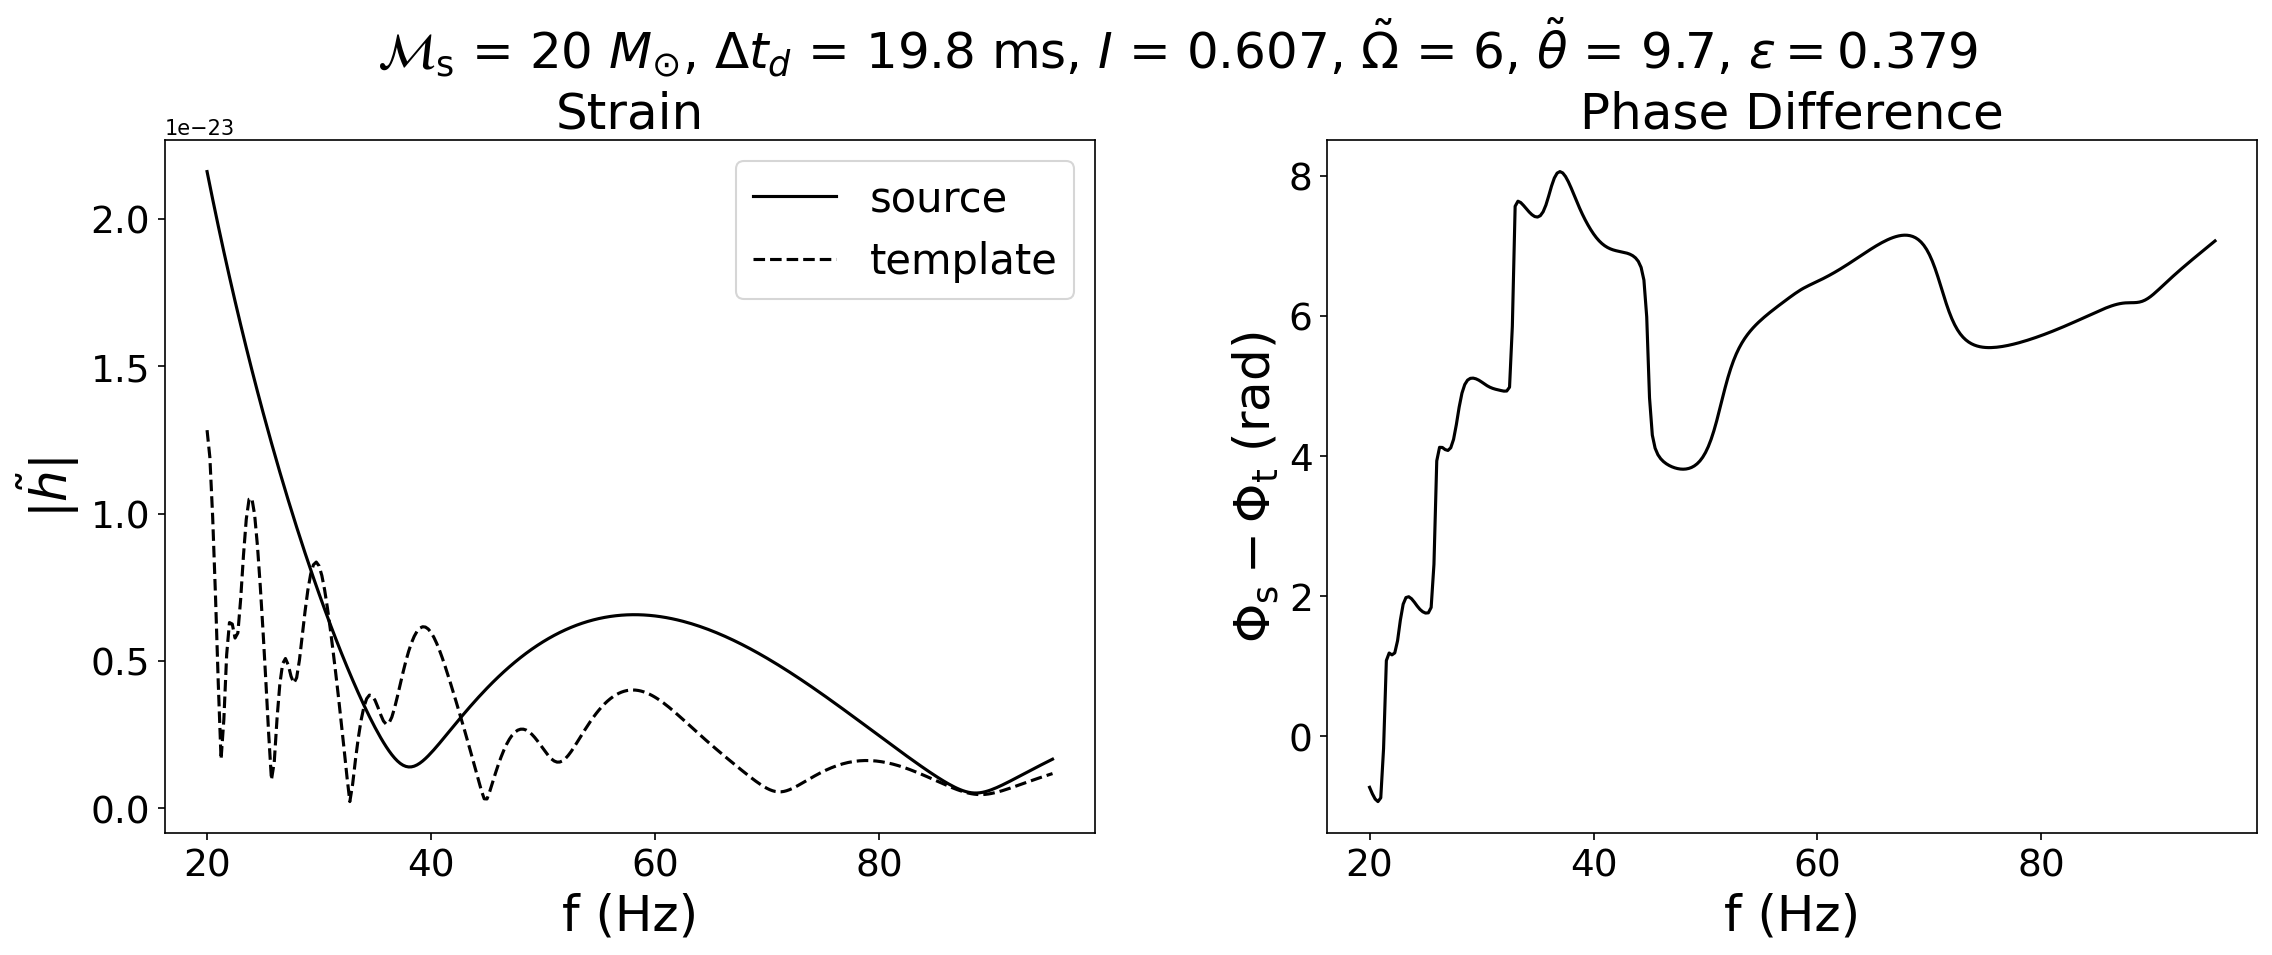

In [70]:
lens_params_0["MLz"] = 2e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["sys2"]["random"], lens_params_0, RP_params_0
)
lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass
RP_params["omega_tilde"] = data_mcz20["stats"]["ep_max_omega_tilde"]
RP_params["theta_tilde"] = data_mcz20["stats"]["ep_max_theta_tilde"]
RP_params["gamma_P"] = data_mcz20["stats"]["ep_max_gammaP"]

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz20_worst.pdf", bbox_inches="tight")

idx = -2.59216, phi = 4.86889e-13, both should be ~0 if get_updated_mismatch_results is True


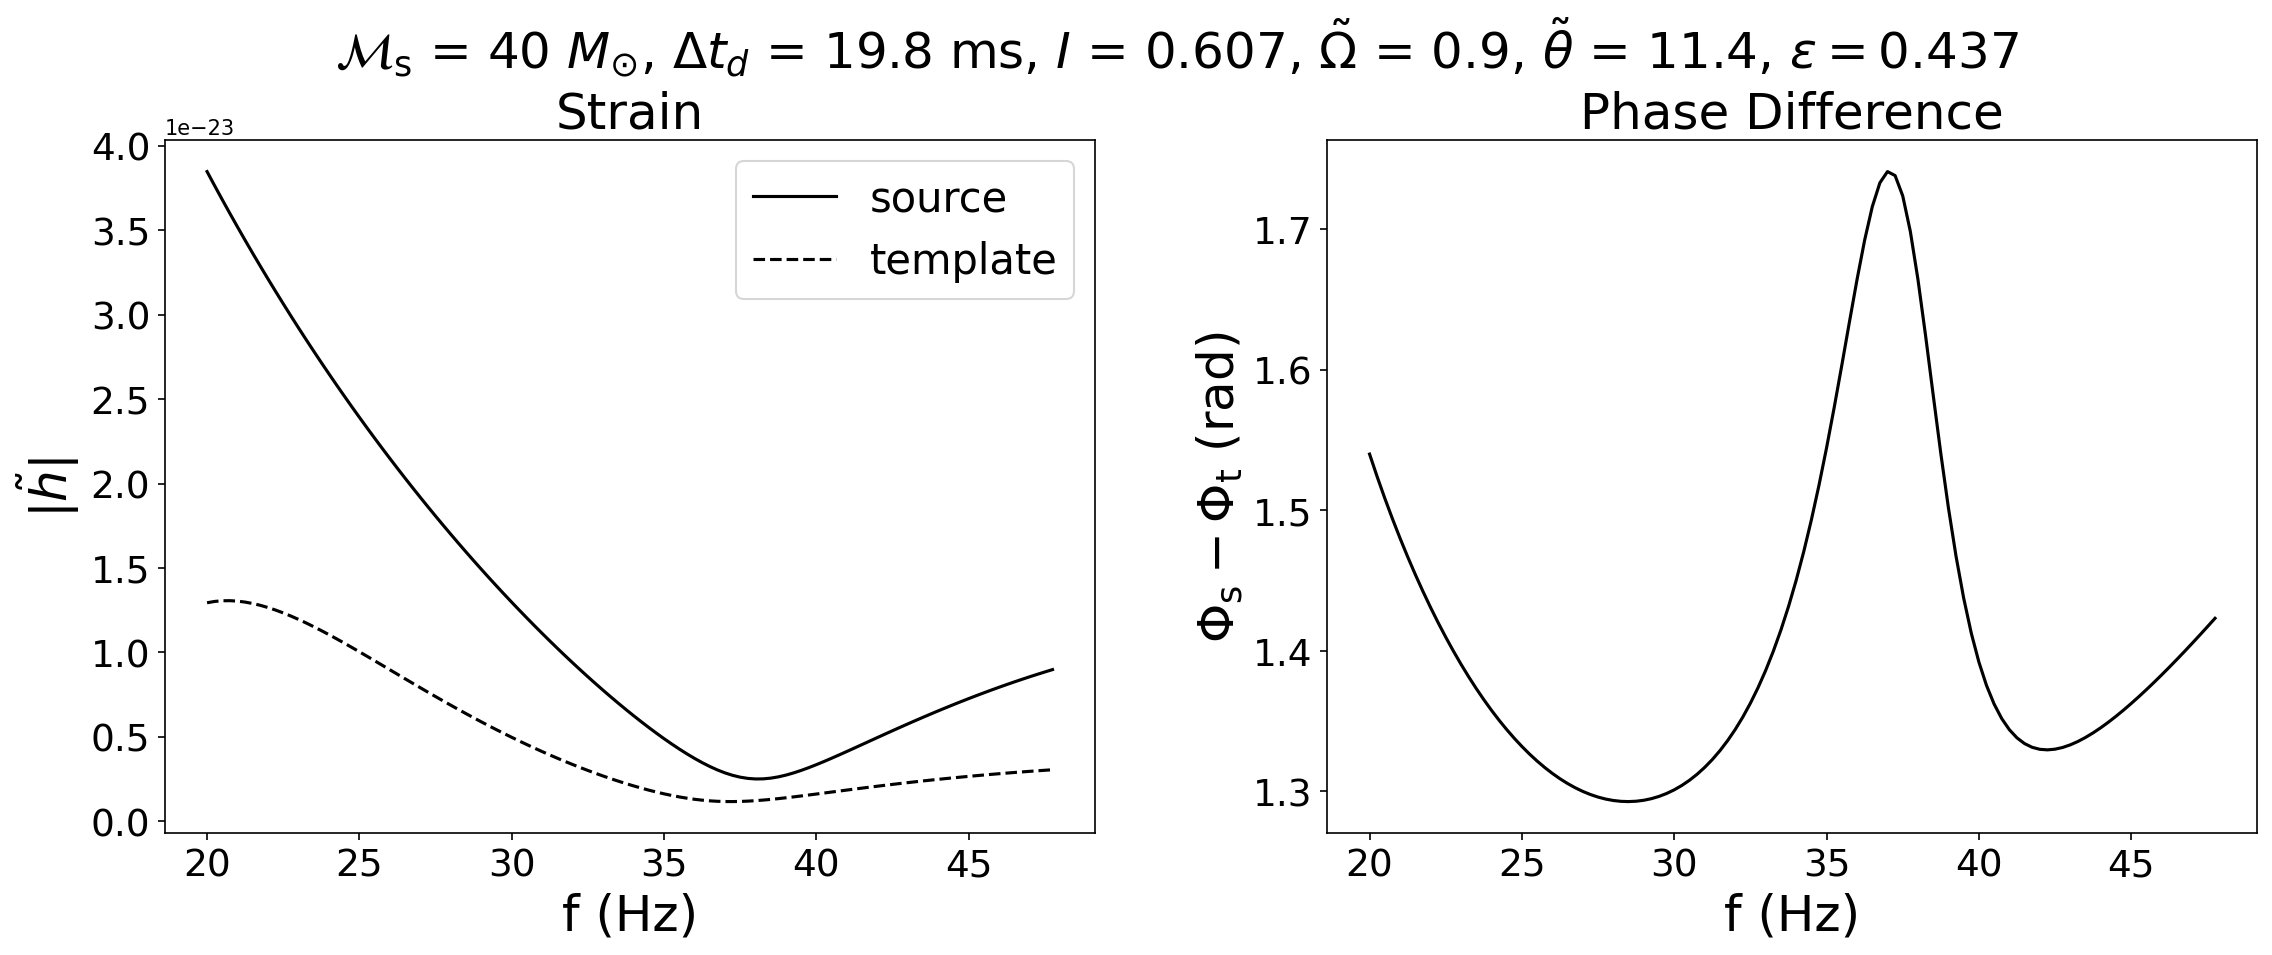

In [116]:
lens_params_0["MLz"] = 2e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["sys2"]["random"], lens_params_0, RP_params_0
)
lens_params["mcz"] = RP_params["mcz"] = 40 * solar_mass
RP_params["omega_tilde"] = data_mcz40["stats"]["ep_min_omega_tilde"]
RP_params["theta_tilde"] = data_mcz40["stats"]["ep_min_theta_tilde"]
RP_params["gamma_P"] = data_mcz40["stats"]["ep_min_gammaP"]

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz40_best.pdf", bbox_inches="tight")

idx = 2.59988, phi = -3.87609e-14, both should be ~0 if get_updated_mismatch_results is True


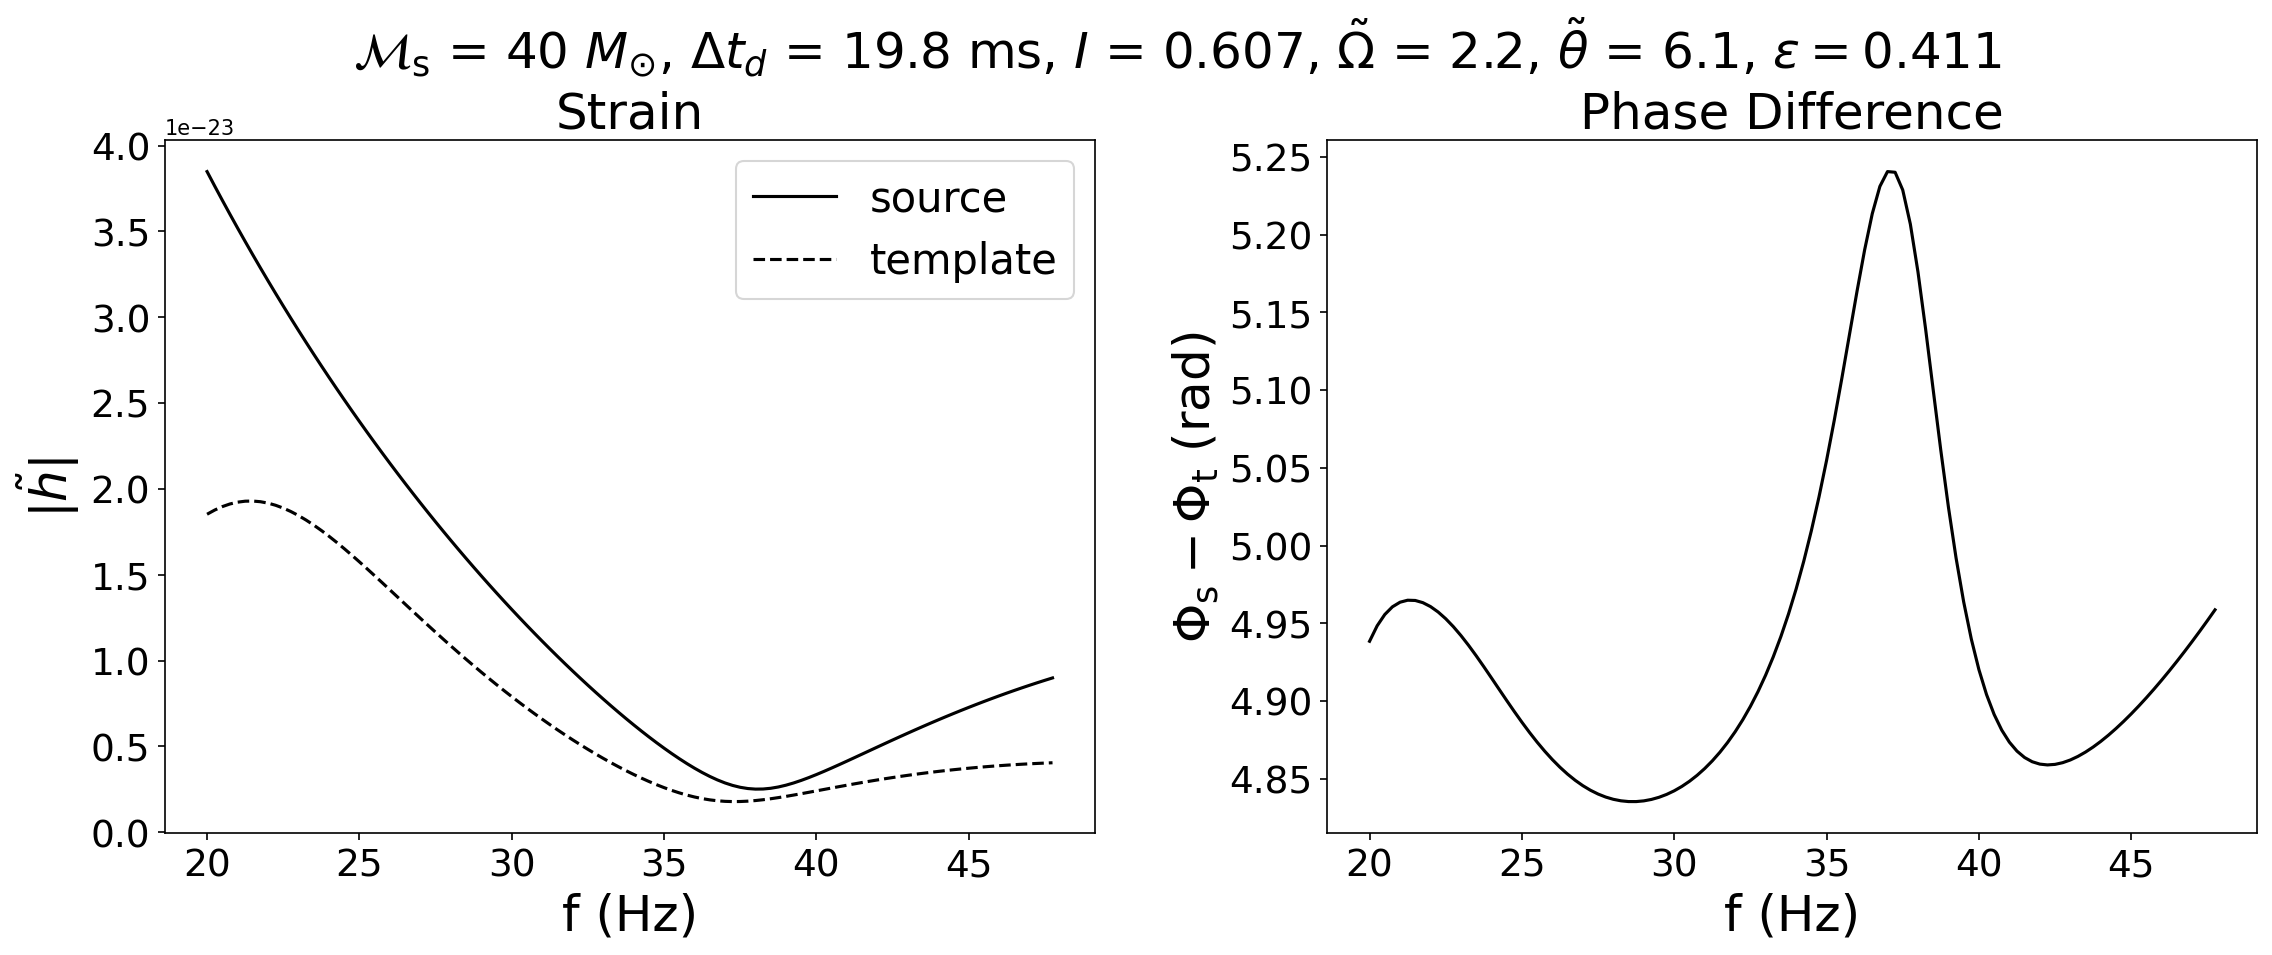

In [117]:
lens_params_0["MLz"] = 2e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["sys2"]["random"], lens_params_0, RP_params_0
)
lens_params["mcz"] = RP_params["mcz"] = 40 * solar_mass
RP_params["omega_tilde"] = 2.2
RP_params["theta_tilde"] = 6.1
RP_params["gamma_P"] = 1.58666296

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz40_best.pdf", bbox_inches="tight")

idx = 218.002, phi = 2.04017e-08, both should be ~0 if get_updated_mismatch_results is True


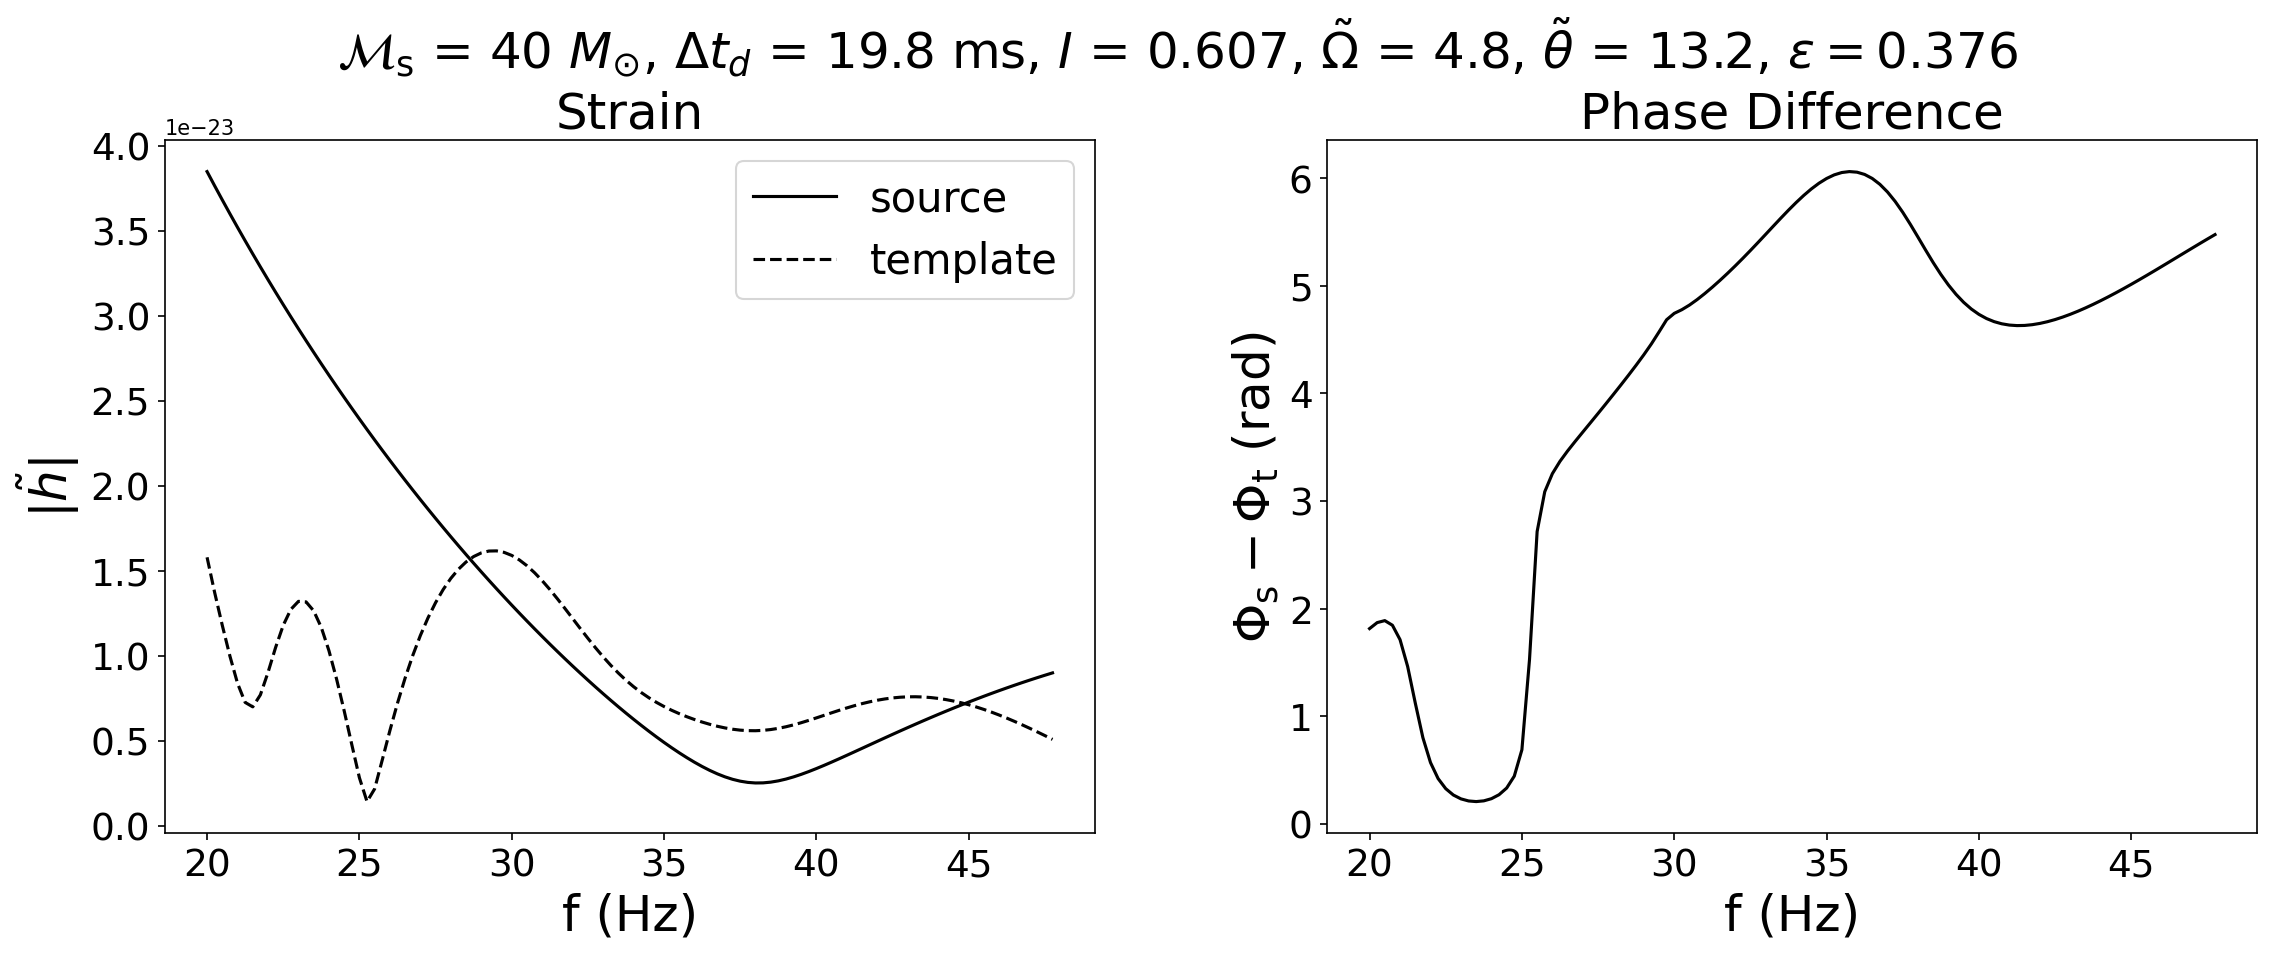

In [72]:
lens_params_0["MLz"] = 2e3 * solar_mass
lens_params, RP_params = set_to_location(
    loc_params["sys2"]["random"], lens_params_0, RP_params_0
)
lens_params["mcz"] = RP_params["mcz"] = 40 * solar_mass
RP_params["omega_tilde"] = data_mcz40["stats"]["ep_max_omega_tilde"]
RP_params["theta_tilde"] = data_mcz40["stats"]["ep_max_theta_tilde"]
RP_params["gamma_P"] = data_mcz40["stats"]["ep_max_gammaP"]

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz40_worst.pdf", bbox_inches="tight")